In [64]:
import xarray as xr
import os
import glob
import rioxarray
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch
import numpy as np


In [65]:
# Dataset winder 2015/2016
home_dir = os.getenv('HOME')
snow_ds = xr.open_mfdataset(glob.glob(home_dir + '/Documents/MST Himalaya/HMA_daily_snow_reanalysis/*.nc'))

In [66]:
start_day = 60
end_day = 149

In [67]:
snow_djf_ds_mean_daily = snow_ds.sel(Day = slice(start_day,end_day), Stats = 0).copy()
snow_djf_ds_median_daily = snow_ds.sel(Day = slice(start_day,end_day), Stats = 2).copy()

In [68]:
snow_djf_ds_mean = snow_djf_ds_mean_daily.mean(dim = 'Day')

In [71]:
snow_djf_ds_mean.SCA_Post.to_netcdf('/Users/jacobqs/Downloads/sca_post.nc')

In [60]:
SCA_Post = snow_djf_ds_mean.SCA_Post.rio.write_crs("epsg:4326", inplace=True)

In [85]:
snow_djf_ds_mean = snow_djf_ds_mean.rename_dims({'Latitude': 'lat', 'Longitude': 'lon'})

In [89]:
snow_djf_ds_mean = snow_djf_ds_mean.rename({'Latitude': 'lat', 'Longitude': 'lon'})

In [94]:
snow_djf_ds_mean = snow_djf_ds_mean.rio.write_crs("epsg:4326", inplace=True)

In [95]:
snow_djf_ds_mean.to_netcdf('/Users/jacobqs/Downloads/mean_snow_djf_2005_2006.nc')

In [33]:
snow_djf_ds_mean

NameError: name 'snow_djf_ds_mean' is not defined

In [97]:
snow_djf_ds_mean.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...

In [93]:
xr.open_mfdataset('/Users/jacobqs/Downloads/mean_snow_djf_2005_2006.nc')
    


<xarray.Dataset>
Dimensions:   (lat: 225, lon: 450)
Coordinates:
  * lat       (lat) float32 29.0 28.99 28.99 28.98 ... 28.02 28.01 28.01 28.0
  * lon       (lon) float32 84.0 84.01 84.01 84.02 ... 85.99 85.99 85.99 86.0
Data variables:
    SWE_Post  (lon, lat) float32 dask.array<chunksize=(450, 225), meta=np.ndarray>
    SCA_Post  (lon, lat) float32 dask.array<chunksize=(450, 225), meta=np.ndarray>

In [80]:
SCA_Post.Latitude.max()

<xarray.DataArray 'Latitude' ()>
array(28.997778, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [81]:
SCA_Post.Longitude.min()

<xarray.DataArray 'Longitude' ()>
array(84.00222, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [82]:
SCA_Post.Longitude.max()

<xarray.DataArray 'Longitude' ()>
array(85.99856, dtype=float32)
Coordinates:
    spatial_ref  int64 0

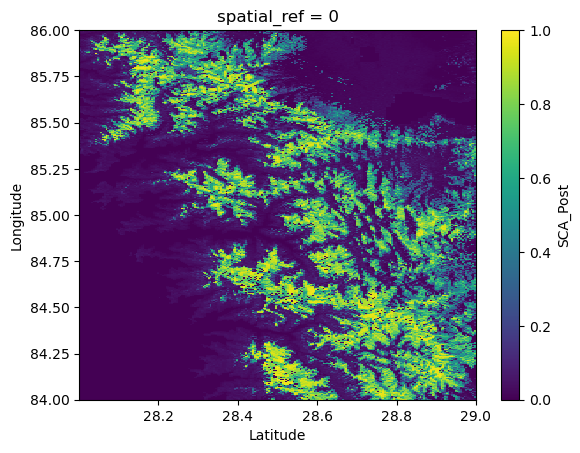

In [63]:
SCA_Post.plot()

In [33]:
snow_djf_ds_mean.to_netcdf('/Users/jacobqs/Downloads/mean_snow_djf_2005_2006.nc')

In [51]:
snow_djf_ds_mean

<xarray.Dataset>
Dimensions:    (Latitude: 225, Longitude: 450)
Coordinates:
  * Latitude   (Latitude) float32 29.0 28.99 28.99 28.98 ... 28.01 28.01 28.0
  * Longitude  (Longitude) float32 84.0 84.01 84.01 84.02 ... 85.99 85.99 86.0
Data variables:
    SWE_Post   (Longitude, Latitude) float32 dask.array<chunksize=(225, 225), meta=np.ndarray>
    SCA_Post   (Longitude, Latitude) float32 dask.array<chunksize=(225, 225), meta=np.ndarray>

In [42]:
rds = rioxarray.open_rasterio('/Users/jacobqs/Downloads/mean_snow_djf_2005_2006.nc')

/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/rioxarray/_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/rioxarray/_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or r

In [45]:
rds.SCA_Post.rio.to_raster('/Users/jacobqs/Downloads/mean_snow_djf_2005_2006.tif')

/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [47]:
rds.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes:
    GeoTransform:  0.0 1.0 0.0 0.0 0.0 1.0

In [101]:
# Elevation map

elevation_file = rasterio.open('/Users/jacobqs/Documents/MST Himalaya/QGIS/DEM/budhi_gandaki_clipped.tif')
elevation_ds = elevation_file.read()

In [109]:
elevation_ds[elevation_ds == 0] = None

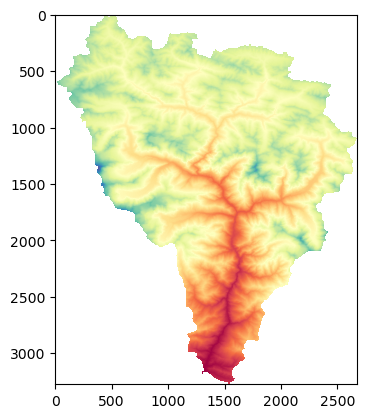

In [111]:
plt.imshow(elevation_ds[0], cmap='Spectral')
plt.show()

In [4]:
import pygmt
minlon, maxlon = 84, 86
minlat, maxlat = 27, 29
topo_data = '@earth_relief_03s'
fig = pygmt.Figure()
# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

#plot high res topography
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading = True,
    frame = True
    )


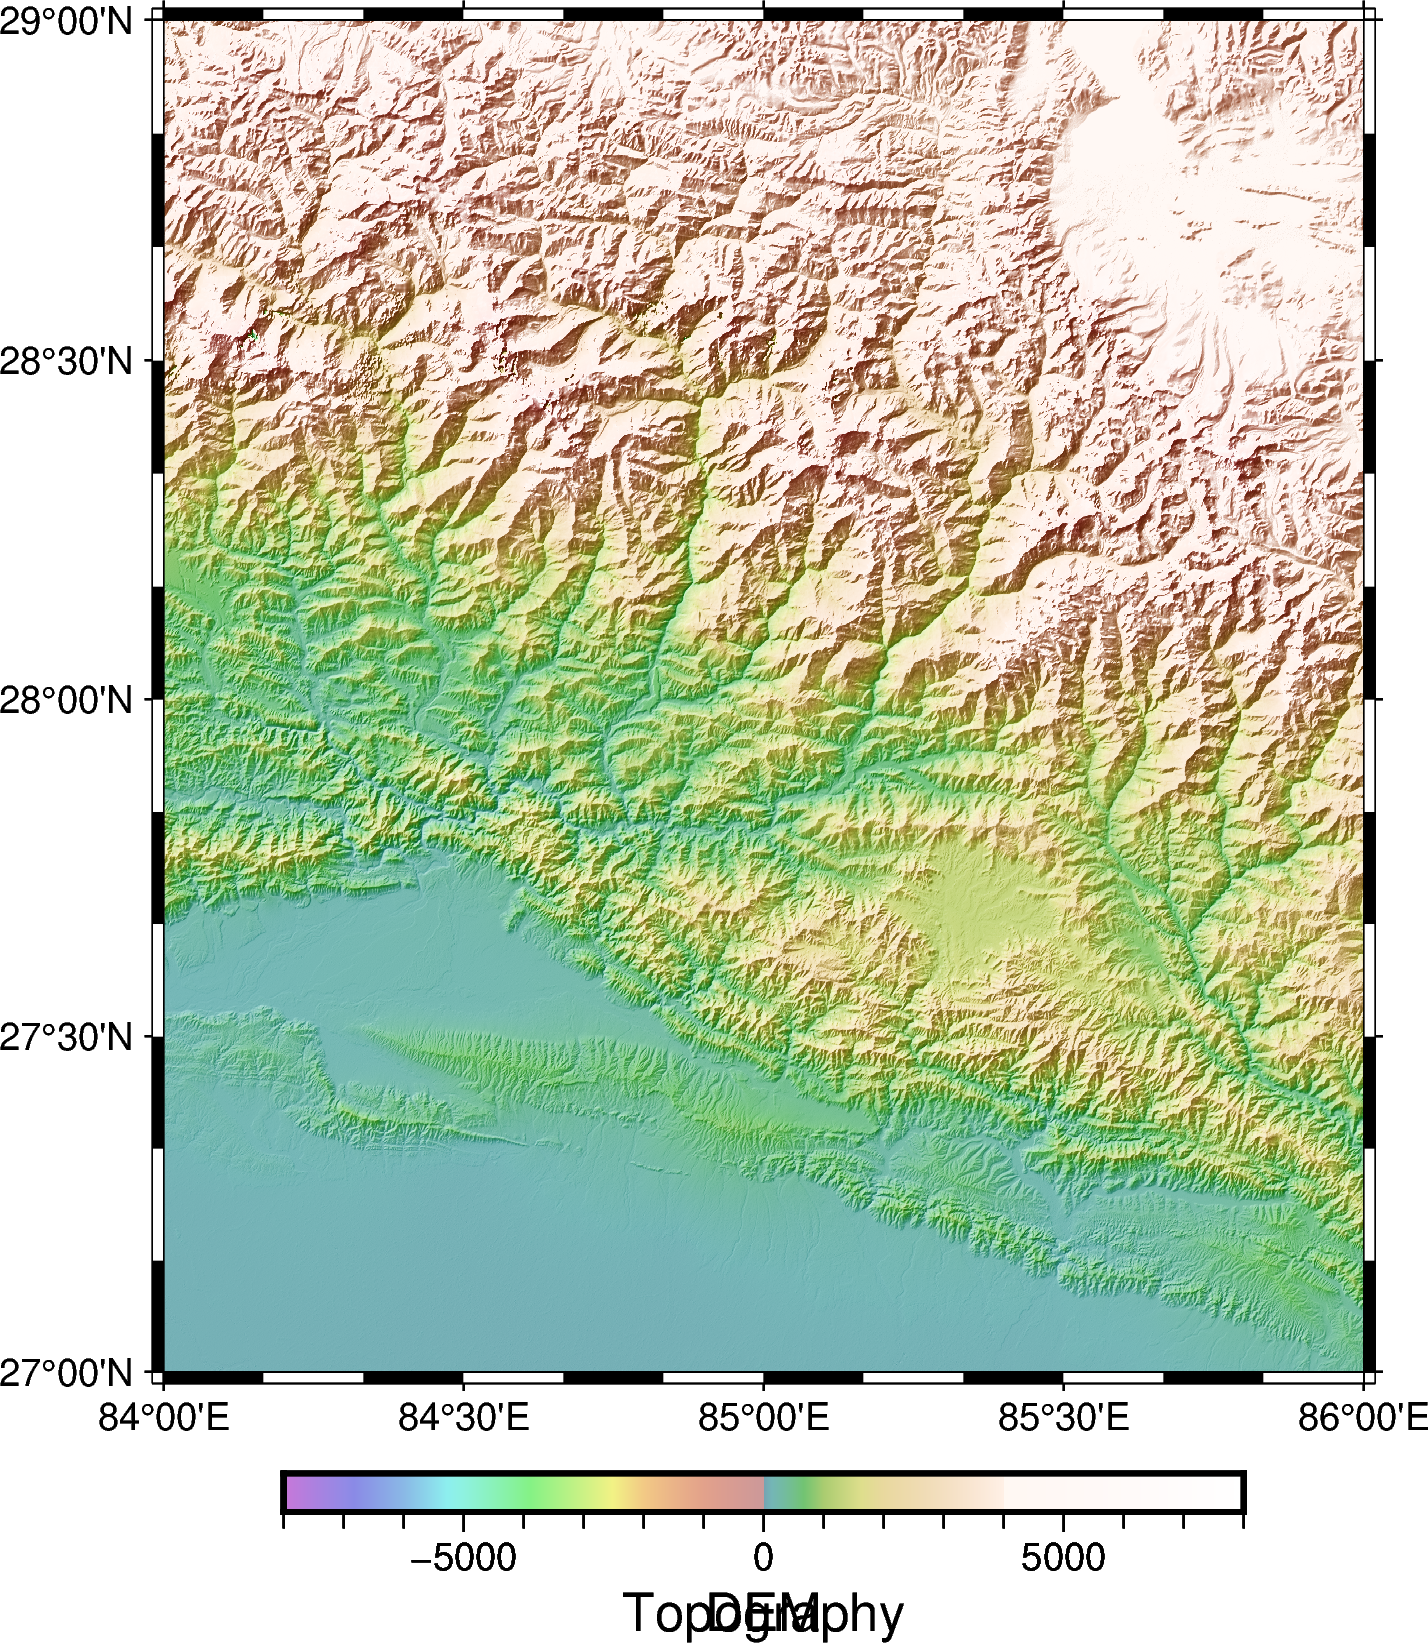

In [117]:
fig.colorbar(
    frame='+l"DEM"'
    )
fig.show()

In [48]:
import geopandas as gpd 
import pygmt 
outline = gpd.read_file('/Users/jacobqs/Downloads/budhi_box_diff.shp')


In [49]:
outline = outline.to_crs(4326)

/var/folders/07/3pj74xcs7mqdgyzchd88y9840000gn/T/ipykernel_26014/808287979.py:22: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data=outline, color = 'white')


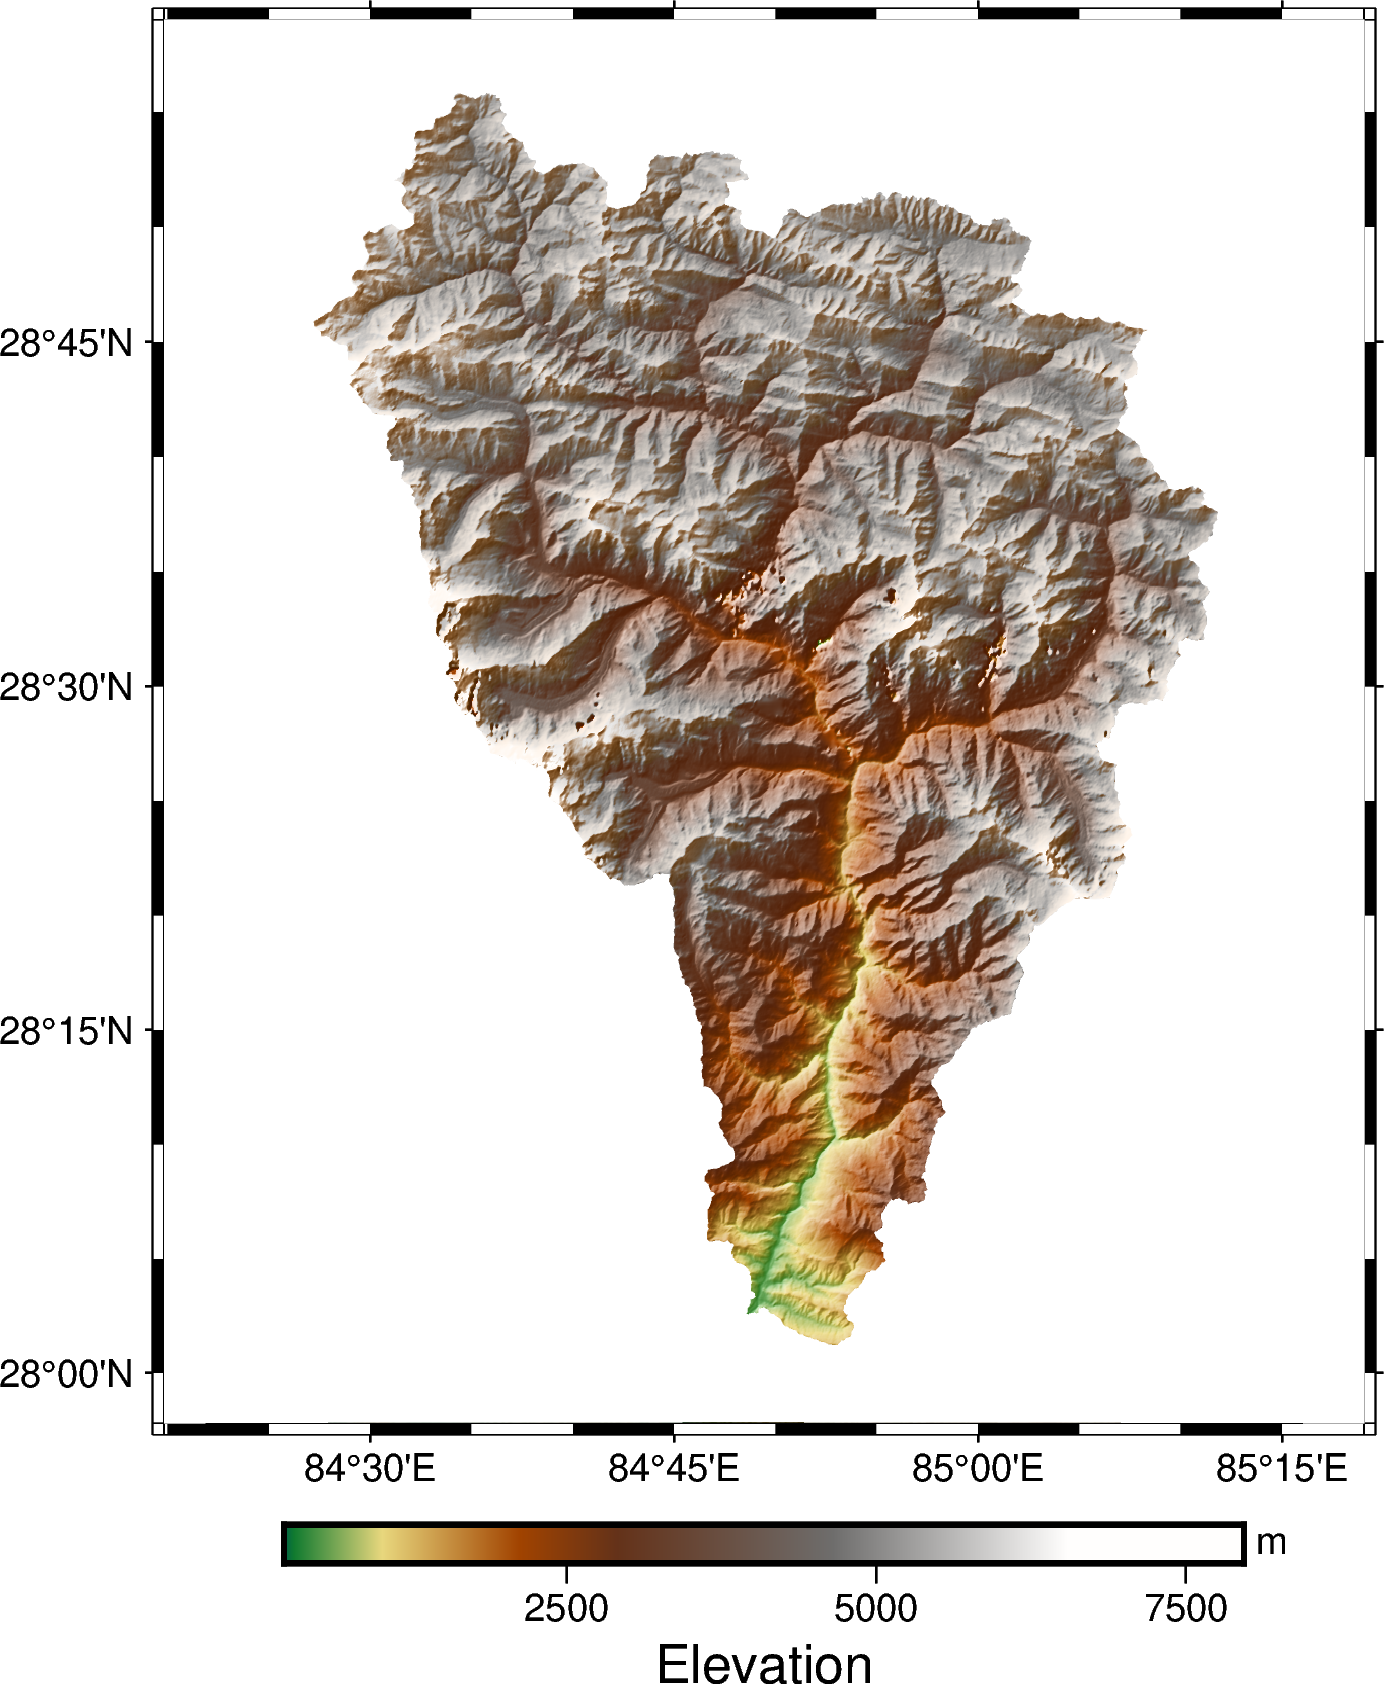

In [30]:
minlon, maxlon = 84.3303588675110660, 85.3173588675110608
minlat, maxlat = 27.9632408856666501, 28.9832408856666497
topo_data = '@earth_relief_03s'
fig = pygmt.Figure()
# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

#plot high res topography
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading = True,
    frame = True,
    cmap = 'geo'
    )

fig.plot(data=outline, color = 'white')
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])
fig.show()

In [42]:
post_sca = pygmt.load_dataarray('/Users/jacobqs/Downloads/sca_post.nc')

grdinfo [WARNING]: The step size of coordinate (Longitude) in grid /Users/jacobqs/Downloads/sca_post.nc is not constant.
grdinfo [WARNING]: GMT will use a constant step size of 0.00444619; the original ranges from 0.00366211 to 0.00444794.
grdinfo [ERROR]: Grid x increment <= 0.0
grdinfo (gmtlib_read_grd_info): Use grdedit -A on your grid file to make region and increments compatible [/Users/jacobqs/Downloads/sca_post.nc]


In [44]:
minlon, maxlon = 84.3303588675110660, 85.3173588675110608
minlat, maxlat = 27.9632408856666501, 28.9832408856666497
topo_data = '@earth_relief_03s'
fig = pygmt.Figure()
# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

#plot high res topography
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading = True,
    frame = True,
    cmap = 'geo'
    )
fig.plot(data = post_sca)
fig.plot(data=outline, color = 'white')
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])

fig.show()

GMTInvalidInput: Unrecognized data type for vector: <class 'xarray.core.dataarray.DataArray'>

In [53]:
df = post_sca.to_dataframe().reset_index()
df

Longitude   Latitude  SCA_Post
0       84.002220  28.997778  0.012297
1       84.002220  28.993334  0.047360
2       84.002220  28.988890  0.050587
3       84.002220  28.984446  0.051218
4       84.002220  28.980001  0.043483
...           ...        ...       ...
101245  85.998558  28.020071  0.041652
101246  85.998558  28.015627  0.033912
101247  85.998558  28.011183  0.061045
101248  85.998558  28.006739  0.057103
101249  85.998558  28.002295  0.054762

[101250 rows x 3 columns]

In [54]:
gdf = gpd.GeoDataFrame(
    df.SCA_Post, geometry=gpd.points_from_xy(df.Longitude,df.Latitude))

In [55]:
gdf

SCA_Post                   geometry
0       0.012297  POINT (84.00222 28.99778)
1       0.047360  POINT (84.00222 28.99333)
2       0.050587  POINT (84.00222 28.98889)
3       0.051218  POINT (84.00222 28.98445)
4       0.043483  POINT (84.00222 28.98000)
...          ...                        ...
101245  0.041652  POINT (85.99856 28.02007)
101246  0.033912  POINT (85.99856 28.01563)
101247  0.061045  POINT (85.99856 28.01118)
101248  0.057103  POINT (85.99856 28.00674)
101249  0.054762  POINT (85.99856 28.00229)

[101250 rows x 2 columns]

/var/folders/07/3pj74xcs7mqdgyzchd88y9840000gn/T/ipykernel_26014/1507509562.py:22: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data=outline, color = 'white')
colorbar [ERROR]: CPT <stdin> has no z-slices!
[Session pygmt-session (131)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)
[Session pygmt-session (131)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)


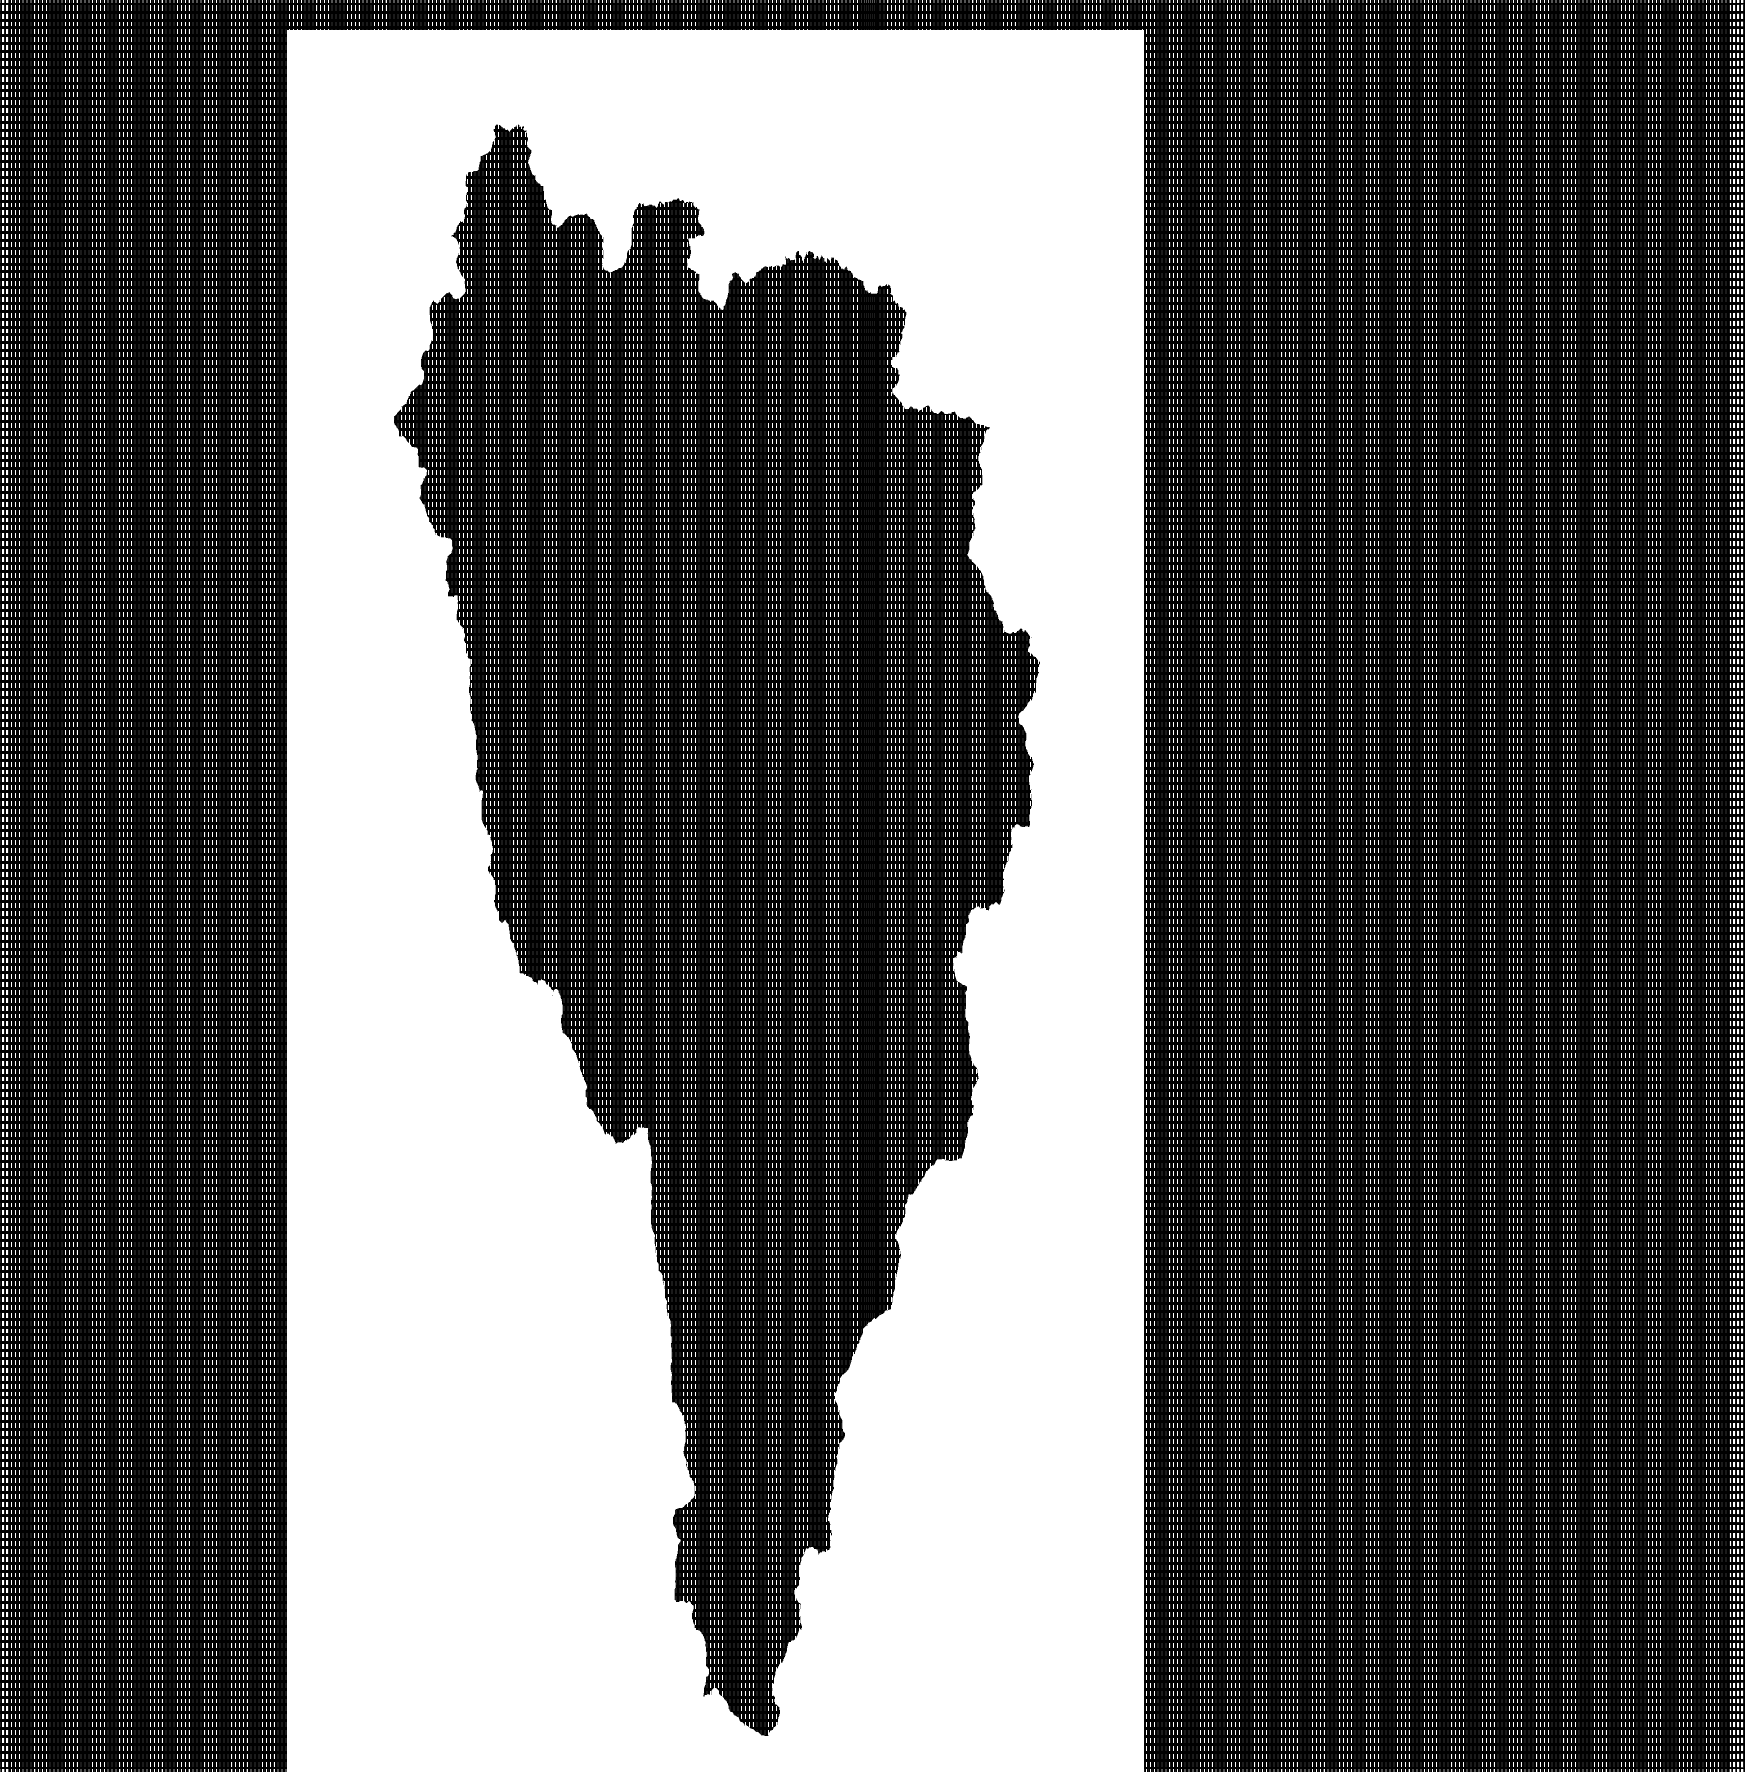

In [57]:
minlon, maxlon = 84.3303588675110660, 85.3173588675110608
minlat, maxlat = 27.9632408856666501, 28.9832408856666497
topo_data = '@earth_relief_03s'
fig = pygmt.Figure()
# make color pallets
# pygmt.makecpt(
#     cmap='topo',
#     series='-8000/8000/1000',
#     continuous=True
# )

# #plot high res topography
# fig.grdimage(
#     grid=topo_data,
#     region=[minlon, maxlon, minlat, maxlat],
#     projection='M4i',
#     shading = True,
#     frame = True,
#     cmap = 'geo'
#     )
fig.plot(data = gdf)
fig.plot(data=outline, color = 'white')
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])

fig.show()

In [3]:
snow = xr.open_mfdataset('/Users/jacobqs/Downloads/mean_snow_djf_2005_2006.nc')

In [33]:
snow_lats = snow.lat.values
snow_lons = snow.lon.values
snow_data = snow.SCA_Post.values.T

In [57]:
mp = Basemap(epsg= 4326,
             llcrnrlat=28.002295,
             llcrnrlon=84.00222,
             urcrnrlat=28.997778,
             urcrnrlon=85.99856,
             resolution='f')

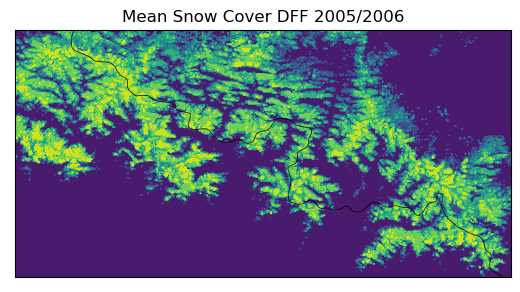

In [58]:
lon, lat = np.meshgrid(snow_lons,snow_lats)  #this converts coordinates into 2D arrray

mp.contourf(lon,lat, snow_data)

# consider this as the outline for the map that is to be created 
#mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

#cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.title('Mean Snow Cover DFF 2005/2006')

plt.grid(True)
plt.show()

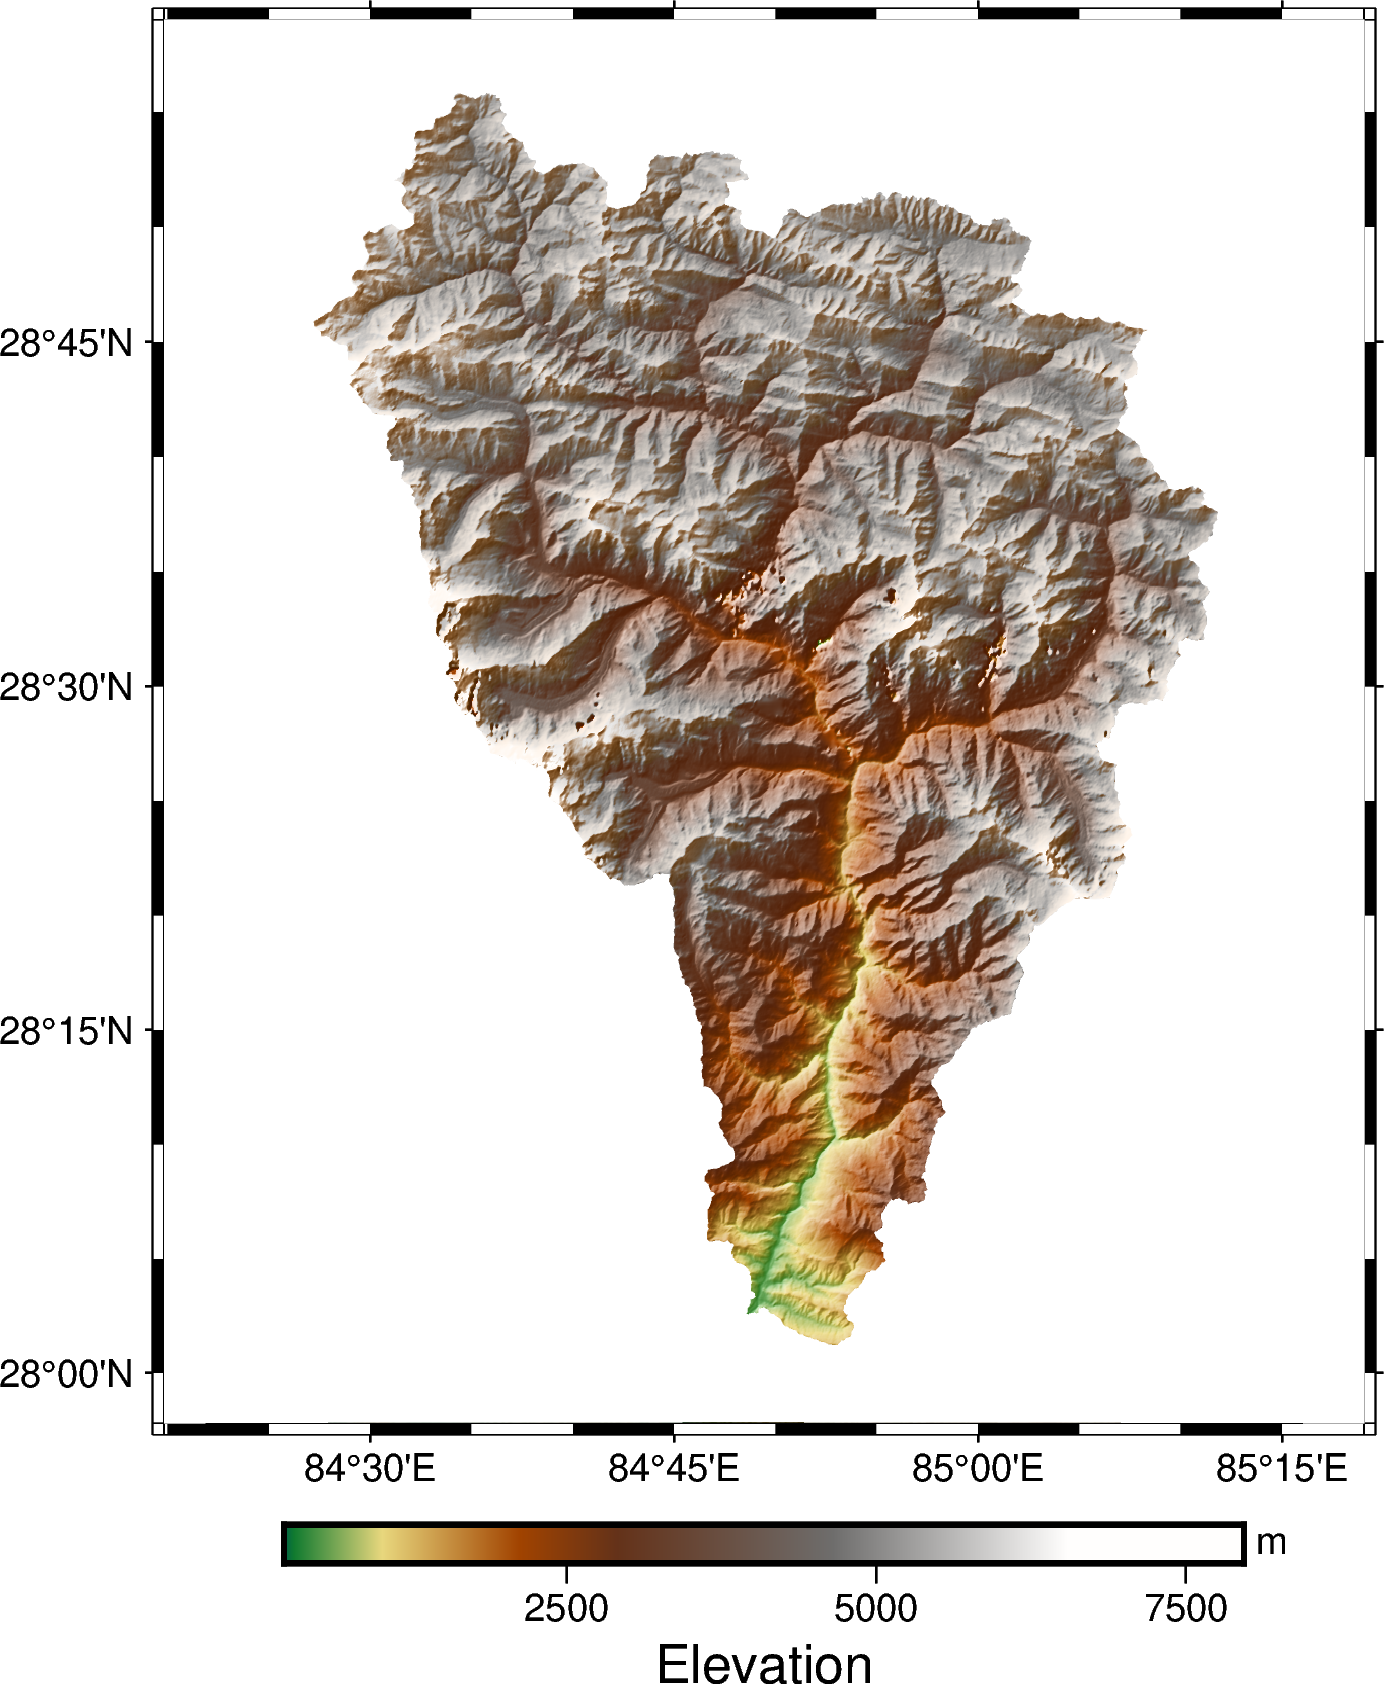

In [60]:
minlon, maxlon = 84.3303588675110660, 85.3173588675110608
minlat, maxlat = 27.9632408856666501, 28.9832408856666497
topo_data = '@earth_relief_03s'
fig = pygmt.Figure()
# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

#plot high res topography
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading = True,
    frame = True,
    cmap = 'geo'
    )

fig.plot(data= snow_data)
fig.plot(data=outline, color = 'white')
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])
fig.show()

In [72]:
convert_netcdf_to_geotiff('/Users/jacobqs/Downloads/sca_post.nc', '/Users/jacobqs/Downloads/test.tiff')

0

In [73]:
nc_file = xr.open_dataset('/Users/jacobqs/Downloads/sca_post.nc')

In [74]:
sca = nc_file.SCA_Post

In [77]:
sca = sca.rio.set_spatial_dims(x_dim = 'Longitude', y_dim = 'Latitude')
sca.rio.crs

In [78]:
# Define the CRS projection
sca.rio.write_crs("epsg:4326", inplace=True)

<xarray.DataArray 'SCA_Post' (Longitude: 450, Latitude: 225)>
[101250 values with dtype=float32]
Coordinates:
  * Latitude     (Latitude) float32 29.0 28.99 28.99 28.98 ... 28.01 28.01 28.0
  * Longitude    (Longitude) float32 84.0 84.01 84.01 84.02 ... 85.99 85.99 86.0
    spatial_ref  int64 0

In [81]:
sca = sca.transpose('Latitude', 'Longitude')

In [83]:
sca = sca.rename({'Latitude': 'y', 'Longitude': 'x'})

In [84]:
sca.rio.to_raster(r"/Users/jacobqs/Downloads/sca_raster.tiff")

In [91]:
from osgeo import gdal
# Open HDF layer
hdflayer = gdal.Open('/Users/jacobqs/Downloads/MCD12Q1.A2005001.h25v06.006.2018145173430.hdf', gdal.GA_ReadOnly)

#Open raster layer
rlayer = gdal.Open(hdflayer.GetSubDatasets()[0][0], gdal.GA_ReadOnly)

In [93]:
hdflayer.GetSubDatasets()

[('HDF4_EOS:EOS_GRID:"/Users/jacobqs/Downloads/MCD12Q1.A2005001.h25v06.006.2018145173430.hdf":MCD12Q1:LC_Type1',
  '[2400x2400] LC_Type1 MCD12Q1 (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/Users/jacobqs/Downloads/MCD12Q1.A2005001.h25v06.006.2018145173430.hdf":MCD12Q1:LC_Type2',
  '[2400x2400] LC_Type2 MCD12Q1 (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/Users/jacobqs/Downloads/MCD12Q1.A2005001.h25v06.006.2018145173430.hdf":MCD12Q1:LC_Type3',
  '[2400x2400] LC_Type3 MCD12Q1 (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/Users/jacobqs/Downloads/MCD12Q1.A2005001.h25v06.006.2018145173430.hdf":MCD12Q1:LC_Type4',
  '[2400x2400] LC_Type4 MCD12Q1 (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/Users/jacobqs/Downloads/MCD12Q1.A2005001.h25v06.006.2018145173430.hdf":MCD12Q1:LC_Type5',
  '[2400x2400] LC_Type5 MCD12Q1 (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/Users/jacobqs/Downloads/MCD12Q1.A2005001.h25v06.006.2018145173430.hdf":MCD12Q1:LC_Prop1_Assessment',
  '[2400x24

In [100]:
output_name = rlayer.GetMetadata_Dict()['LOCALGRANULEID'][:-4] + '_snow.tiff'
output_raster = '/Users/jacobqs/Downloads/' + output_name

In [102]:
gdal.Warp(output_raster, rlayer, dstSRS = 'EPSG:4326')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x194396160> >